In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [8]:
# Функция точного решения
def true_solution(t):
    return np.array([np.cosh(t), np.sinh(t)])


# Метод Эйлера (1 порядок)
def euler(f, f_t0, t1, t2, h):
    num_steps = int((t2 - t1) / h)
    solution = np.zeros((num_steps + 1, len(f_t0)))
    solution[0] = f_t0
    t = t1
    for step in range(1, num_steps + 1):
        solution[step] = solution[step - 1] + h * f(t, solution[step - 1])
        t += h
    return solution


# Метод трапеций (2 порядок)
def trapezoidal(f, f_t0, t1, t2, h):
    num_steps = int((t2 - t1) / h)
    solution = np.zeros((num_steps + 1, len(f_t0)))
    solution[0] = f_t0
    time = t1
    for step in range(1, num_steps + 1):
        predicted = solution[step - 1] + h * f(time, solution[step - 1])
        solution[step] = solution[step - 1] + (h / 2) * (f(time, solution[step - 1]) + f(time + h, predicted))
        time += h
    return solution


# Метод Рунге-Кутты 4-го порядка
def runge_kutta(f, f_t0, t1, t2, h):
    num_steps = int((t2 - t1) / h)
    solution = np.zeros((num_steps + 1, len(f_t0)))
    solution[0] = f_t0
    time = t1
    for step in range(1, num_steps + 1):
        k1 = f(time, solution[step - 1])
        k2 = f(time + h / 2, solution[step - 1] + h / 2 * k1)
        k3 = f(time + h / 2, solution[step - 1] + h / 2 * k2)
        k4 = f(time + h, solution[step - 1] + h * k3)
        solution[step] = solution[step - 1] + (h / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
        time += h
    return solution

In [24]:
# Функция для правой части дифференциального уравнения
def equation(t, state):
    return np.array([state[1], state[0]])

# Параметры задачи
t1, t2 = 0, 10
f_t0 = np.array([1, 0])  # y(0) = 1, y'(0) = 0
h_values = np.logspace(-1, -10, 10, base=2)*0.1

euler_errors = []
trapezoidal_errors = []
rk4_errors = []

for h in h_values:
    euler_solution = euler(equation, f_t0, t1, t2, h)
    trapezoidal_solution = trapezoidal(equation, f_t0, t1, t2, h)
    rk4_solution = runge_kutta(equation, f_t0, t1, t2, h)

    exact_solution = true_solution(t2)

    euler_error = np.linalg.norm(euler_solution[-1] - exact_solution)
    trapezoidal_error = np.linalg.norm(trapezoidal_solution[-1] - exact_solution)
    rk4_error = np.linalg.norm(rk4_solution[-1] - exact_solution)

    euler_errors.append(euler_error)
    trapezoidal_errors.append(trapezoidal_error)
    rk4_errors.append(rk4_error)

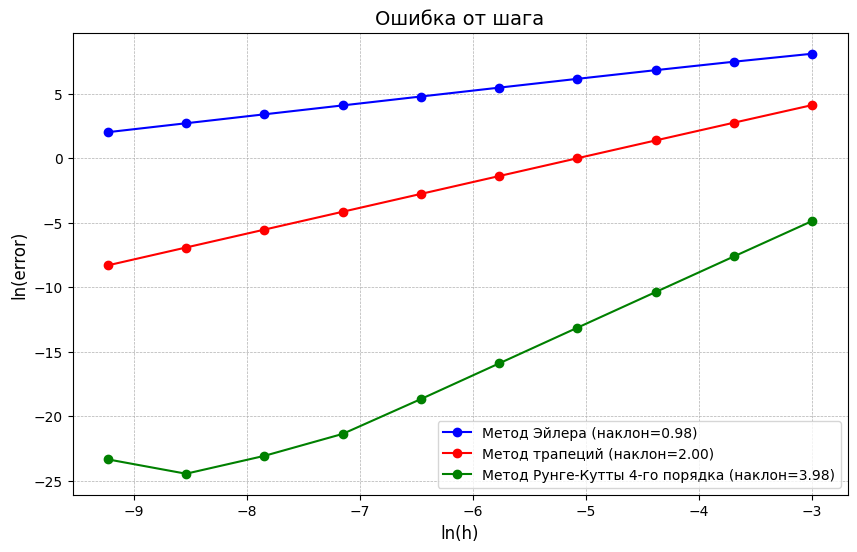

In [27]:
log_hs = np.log(h_values)
log_euler_errors = np.log(euler_errors)
log_trapezoidal_errors = np.log(trapezoidal_errors)
log_rk4_errors = np.log(rk4_errors)

# Вычисление наклонов (точность методов)
euler_slope, _, _, _, _ = linregress(log_hs, log_euler_errors)
trapezoidal_slope, _, _, _, _ = linregress(log_hs, log_trapezoidal_errors)
rk4_slope, _, _, _, _ = linregress(log_hs[:4], log_rk4_errors[:4])

plt.figure(figsize=(10, 6))
plt.plot(log_hs, log_euler_errors, marker='o', color='blue', label=f'Метод Эйлера (наклон={euler_slope:.2f})')
plt.plot(log_hs, log_trapezoidal_errors, marker='o', color='red', label=f'Метод трапеций (наклон={trapezoidal_slope:.2f})')
plt.plot(log_hs, log_rk4_errors, marker='o', color='green', label=f'Метод Рунге-Кутты 4-го порядка (наклон={rk4_slope:.2f})')

plt.title('Ошибка от шага', fontsize=14)
plt.xlabel('ln(h)', fontsize=12)
plt.ylabel('ln(error)', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.show()